In [2]:
# # Évaluer la qualité d'un modèle:

# # Modèle supervisé de classification: 
from sklearn.metrics import confusion_matrix, classification_report

# # Valeurs réelles et prédictions du modèle
y_true = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]  # 1 = Spam, 0 = Non Spam
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

# # Génération de la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

print("Matrice de confusion :")
print(cm)

# # Rapport de classification (précision, rappel, F1-score)
print("\nRapport de classification :")
print(classification_report(y_true, y_pred))

Matrice de confusion :
[[3 2]
 [2 3]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.60      0.60      0.60         5

    accuracy                           0.60        10
   macro avg       0.60      0.60      0.60        10
weighted avg       0.60      0.60      0.60        10



In [4]:
# # Modèle supervisé de régression:

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Génération des données
# Exemple de données synthétiques
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Caractéristiques (100 exemples, 1 caractéristique)
y = 3 * X.flatten() + np.random.randn(100) * 3  # Cible avec un peu de bruit

# 2. Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardiser les données:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prédictions
y_pred = model.predict(X_test)

# 5. Évaluation du modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Affichage des métriques
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.77
Mean Squared Error (MSE): 5.88
Root Mean Squared Error (RMSE): 2.43
R^2 Score: 0.93


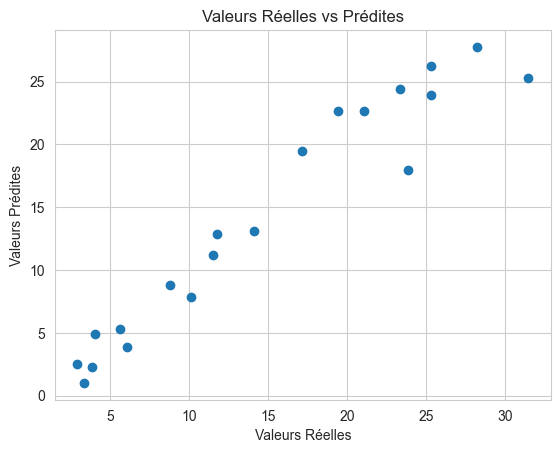

In [5]:
# # Visualisation:

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Valeurs Réelles vs Prédites")
plt.show()

Scores pour chaque fold : [104.20222653  66.52074552  63.17447946  69.47370565 105.17473228]
Erreur quadratique moyenne (MSE) moyenne : 81.71
Écart-type des MSE : 18.87


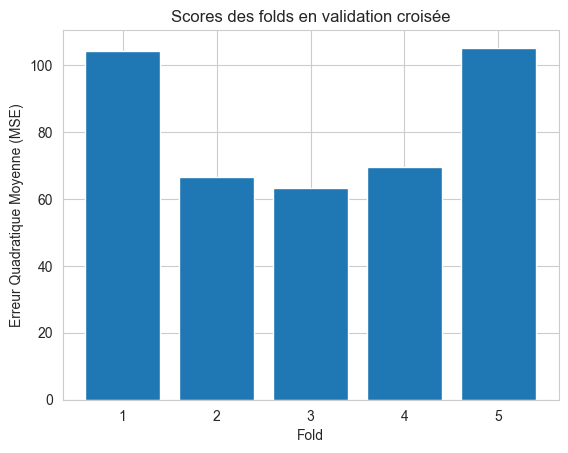

In [8]:
# # Validation croisée:

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# 1. Génération de données synthétiques
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 2. Modèle de régression
model = LinearRegression()

# 3. Initialisation de la validation croisée (K-Fold)
k = 5  # Nombre de folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 4. Calcul des scores de validation croisée
# Utilisation de la métrique de scoring 'neg_mean_squared_error'
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

# 5. Affichage des résultats
print(f"Scores pour chaque fold : {-scores}")
print(f"Erreur quadratique moyenne (MSE) moyenne : {np.mean(-scores):.2f}")
print(f"Écart-type des MSE : {np.std(-scores):.2f}")


plt.bar(range(1, k + 1), -scores)
plt.xlabel("Fold")
plt.ylabel("Erreur Quadratique Moyenne (MSE)")
plt.title("Scores des folds en validation croisée")
plt.show()
